In [248]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [233]:
fifa_matches_df = pd.read_csv('./datafiles/matches.csv')
fifa_matches_df.sample(5)

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long
491,Netherlands,Saudi Arabia,2,NaN,NaN,1,NaN,NaN,Dick Advocaat,Ronald Koeman,...,NaN,NaN,NaN,NaN,NaN,NaN,"['36&rsquor;|0:1|Ulrich van Gobbel', '75&rsquo...","['28&rsquor;|0:1|Abdullah Al-Dosari', '31&rsqu...",['57&rsquor;|1:1|Gaston Taument|for Marc Overm...,['45&rsquor;|0:1|Hamzah Idris|for Majed Abdull...
366,France,Uruguay,0,NaN,NaN,0,NaN,NaN,Roger Lemerre,NaN,...,NaN,NaN,Thierry Henry · 25,NaN,NaN,NaN,['45+2&rsquor;|0:0|Emmanuel Petit'],"['11&rsquor;|0:0|Pablo García', '45+2&rsquor;|...",['16&rsquor;|0:0|Vincent Candela|for Frank Leb...,['60&rsquor;|0:0|Federico Magallanes|for Darío...
137,Belgium,United States,2,NaN,NaN,1,NaN,NaN,Marc Wilmots,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,['42&rsquor;|0:0|Vincent Kompany'],['18&rsquor;|0:0|Geoff Cameron'],['60&rsquor;|0:0|Kevin Mirallas|for Dries Mert...,['32&rsquor;|0:0|DeAndre Yedlin|for Fabian Joh...
842,Czechoslovakia,Argentina,6,NaN,NaN,1,NaN,NaN,Karel Kolsky,Ladislav Novák,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,Uruguay,Portugal,2,0.6,NaN,1,1.0,NaN,Óscar Tabárez,Diego Godín,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['90+3&rsquor;|2:1|Cristiano Ronaldo'],['63&rsquor;|2:1|Cristian Rodríguez|for Rodrig...,['65&rsquor;|2:1|Ricardo Quaresma|for Adrien S...


In [96]:
fifa_matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   home_team                        964 non-null    object 
 1   away_team                        964 non-null    object 
 2   home_score                       964 non-null    int64  
 3   home_xg                          128 non-null    float64
 4   home_penalty                     35 non-null     float64
 5   away_score                       964 non-null    int64  
 6   away_xg                          128 non-null    float64
 7   away_penalty                     35 non-null     float64
 8   home_manager                     964 non-null    object 
 9   home_captain                     644 non-null    object 
 10  away_manager                     964 non-null    object 
 11  away_captain                     644 non-null    object 
 12  Attendance            

In [3]:
covid_df = pd.read_csv('./datafiles/MentalHealthinPregnancyDuringCovid.csv')
covid_df.sample(5)

,OSF_ID,Maternal_Age,Household_Income,Maternal_Education,Edinburgh_Postnatal_Depression_Scale,PROMIS_Anxiety,Gestational_Age_At_Birth,Delivery_Date(converted to month and year),Birth_Length,Birth_Weight,Delivery_Mode,NICU_Stay,Language,Threaten_Life,Threaten_Baby_Danger,Threaten_Baby_Harm
1469,1470,29.3,"$70,000-$99,999",College/trade school,7.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,English,78.0,100.0,100.0
2327,2328,35.5,"$150,000 - $174,999",College/trade school,9.0,13.0,39.14,Sep2020,48.00,2949.0,Caesarean-section (c-section),No,English,82.0,76.0,85.0
1889,1890,33.4,"$200,000+",Masters degree,11.0,17.0,39.71,Dec2020,43.18,2892.0,Vaginally,No,English,18.0,29.0,61.0
694,695,33.5,"$200,000+",Doctoral Degree,4.0,11.0,39.43,Jun2020,55.88,4097.0,Vaginally,No,English,27.0,31.0,25.0
5488,5489,31.3,"$175,000- $199,999",Masters degree,7.0,14.0,40.29,Nov2020,50.04,3289.0,Vaginally,No,English,27.0,25.0,71.0


1. Bar Plot: Show the total number of goals scored by each team (home and away
combined). (fifa_matches dataset)

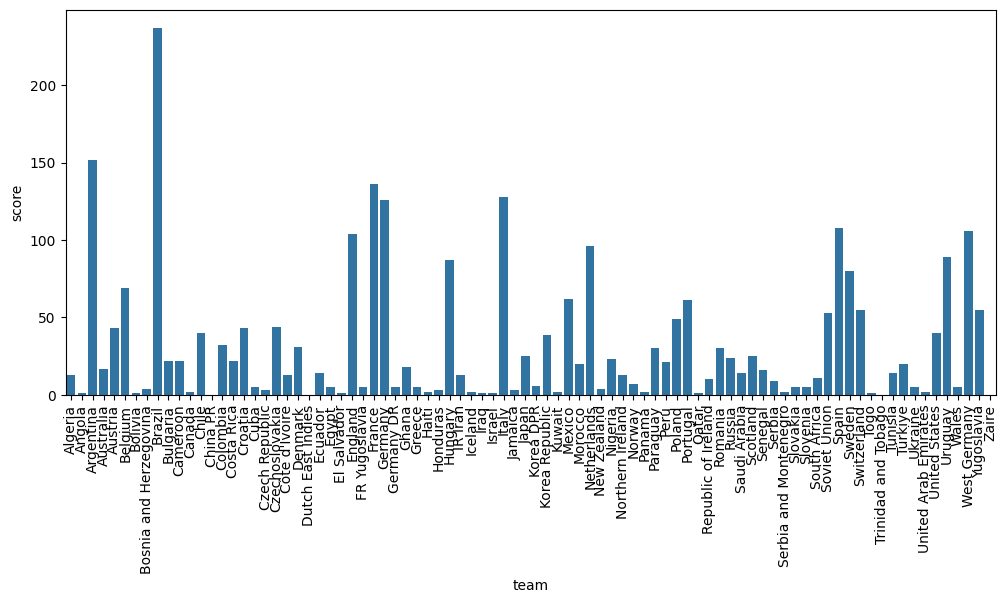

In [35]:
home_team_df = fifa_matches_df[['home_team', 'home_score']]
home_team_df = home_team_df.rename(columns = {'home_team': 'team', 'home_score': 'score'})
away_team_df = fifa_matches_df[['away_team', 'away_score']]
away_team_df = away_team_df.rename(columns = {'away_team': 'team', 'away_score': 'score'})

temp_df = pd.concat([home_team_df, away_team_df])
temp_df = temp_df.groupby('team').sum()

fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(data=temp_df, x='team', y = 'score', ax=ax )

plt.xticks(rotation='vertical')
plt.show()

2. Bar Plot: Show the number of yellow cards received by each team during the
tournament. (fifa_matches dataset)

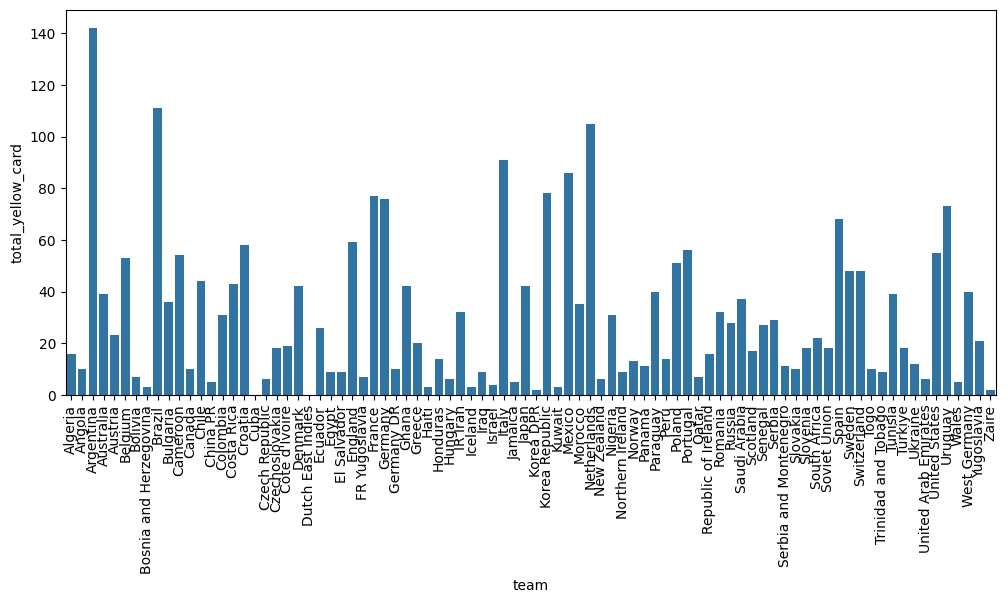

In [41]:
fifa_matches_df['no_home_yellow_card_long'] = fifa_matches_df['home_yellow_card_long'].str.split(",").str.len()
fifa_matches_df['no_away_yellow_card_long'] = fifa_matches_df['away_yellow_card_long'].str.split(",").str.len()
home_team_df = fifa_matches_df[['home_team', 'no_home_yellow_card_long']]
home_team_df = home_team_df.rename(columns = {'home_team': 'team', 'no_home_yellow_card_long': 'total_yellow_card'})
away_team_df = fifa_matches_df[['away_team', 'no_away_yellow_card_long']]
away_team_df = away_team_df.rename(columns = {'away_team': 'team', 'no_away_yellow_card_long': 'total_yellow_card'})

temp_df = pd.concat([home_team_df, away_team_df])
temp_df = temp_df.groupby('team').sum()

fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(data=temp_df, x='team', y = 'total_yellow_card', ax=ax )

plt.xticks(rotation='vertical')
plt.show()

3. Box Plot: Show the distribution of scores (home_score and away_score) for all teams.
(Use subplots of matplotlib or seaborn). (fifa_matches dataset)

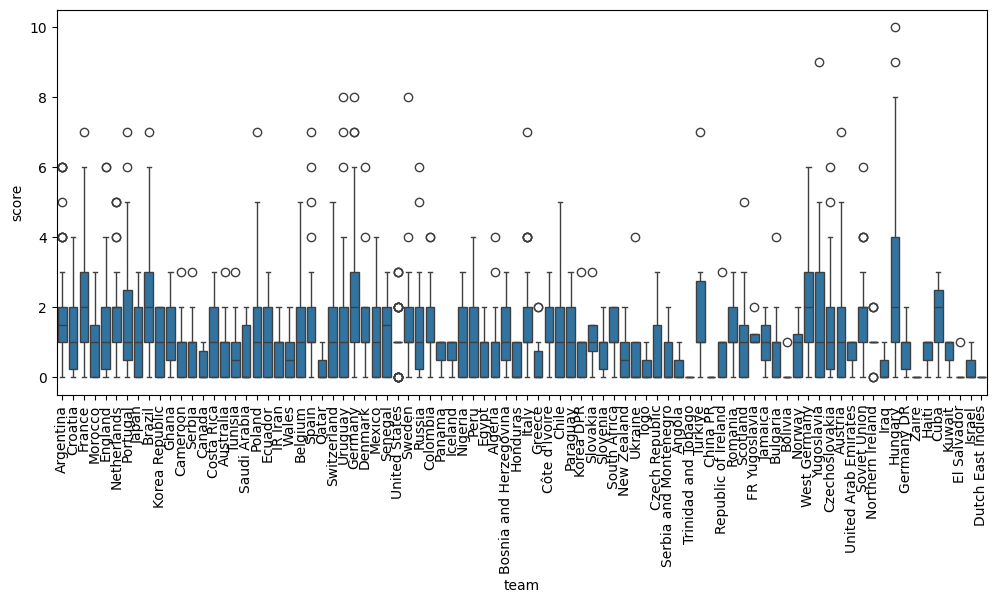

In [46]:
home_team_df = fifa_matches_df[['home_team', 'home_score']]
home_team_df = home_team_df.rename(columns = {'home_team': 'team', 'home_score': 'score'})
away_team_df = fifa_matches_df[['away_team', 'away_score']]
away_team_df = away_team_df.rename(columns = {'away_team': 'team', 'away_score': 'score'})

temp_df = pd.concat([home_team_df, away_team_df])

fig, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(data=temp_df, x='team', y = 'score', ax=ax )

plt.xticks(rotation='vertical')
plt.show()

4. Stacked Bar Plot: Display the number of wins, draws, and losses for all home teams.
(fifa_matches dataset)

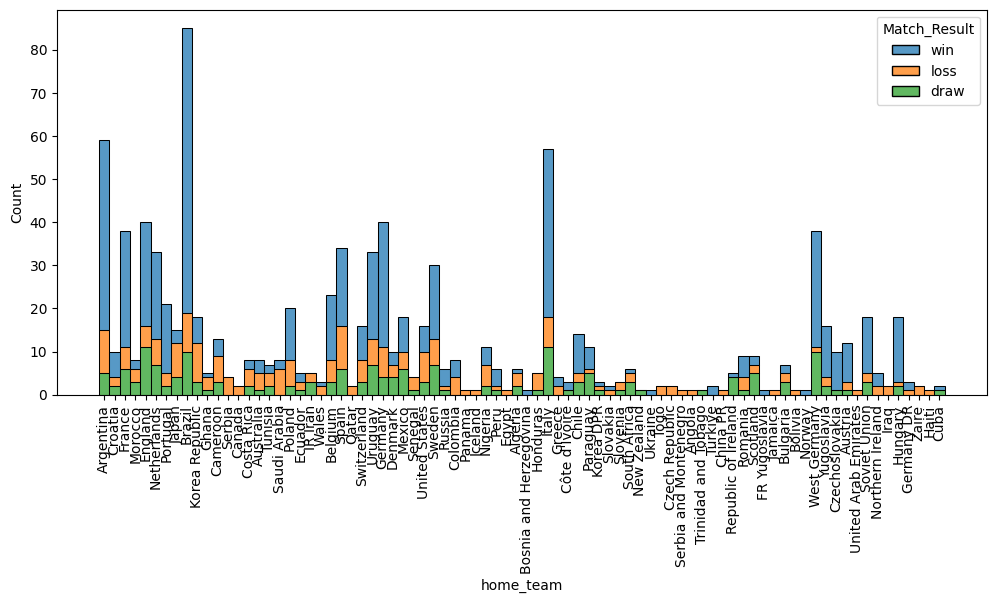

In [91]:
fifa_matches_df['home_total_score'] = fifa_matches_df['home_score'].fillna(0) + fifa_matches_df['home_penalty'].fillna(0)
fifa_matches_df['away_total_score'] = fifa_matches_df['away_score'].fillna(0) + fifa_matches_df['away_penalty'].fillna(0)

fifa_matches_df.loc[(fifa_matches_df['home_total_score'] > fifa_matches_df['away_total_score']), 'Match_Result'] = 'win'
fifa_matches_df.loc[(fifa_matches_df['home_total_score'] < fifa_matches_df['away_total_score']), 'Match_Result'] = 'loss'
fifa_matches_df.loc[(fifa_matches_df['home_total_score'] == fifa_matches_df['away_total_score']), 'Match_Result'] = 'draw'

# fifa_matches_df['Match_Result'].groupby()

# fifa_matches_df.groupby(['Match_Result']).count()
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(data=fifa_matches_df, x='home_team', hue='Match_Result',multiple="stack", ax=ax)
plt.xticks(rotation='vertical')
plt.show()

5. Pie Chart: Show the number of times country becomes champion. (fifa_matches dataset)

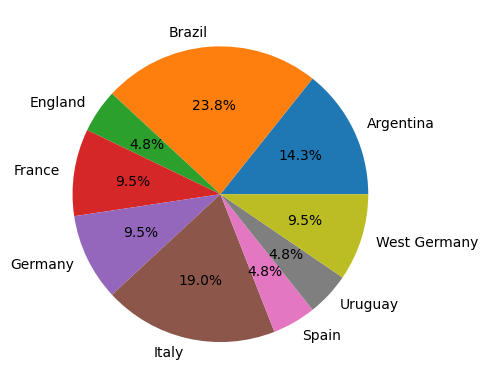

In [150]:
temp_df = fifa_matches_df[['home_team', 'away_team', 'Round', 'home_total_score', 'away_total_score']]
temp_df = temp_df[fifa_matches_df['Round'] == 'Final']

temp_df.loc[temp_df['home_total_score']>temp_df['away_total_score'], 'winner_team'] = temp_df['home_team']
temp_df.loc[temp_df['home_total_score']<temp_df['away_total_score'], 'winner_team'] = temp_df['away_team']

temp_df = temp_df.groupby('winner_team').count()

plt.pie(temp_df['Round'], labels=temp_df.index, autopct='%0.1f%%')
plt.show()

6. Pie Chart: Show the number of times country becomes runner up. (fifa_matches dataset)

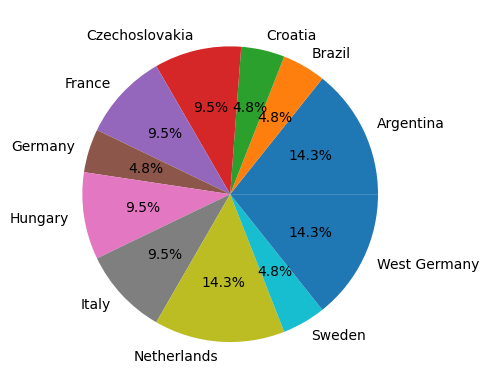

In [156]:
temp_df = fifa_matches_df[['home_team', 'away_team', 'Round', 'home_total_score', 'away_total_score']]
temp_df = temp_df[fifa_matches_df['Round'] == 'Final']

temp_df.loc[temp_df['home_total_score']>temp_df['away_total_score'], 'runner_up_team'] = temp_df['away_team']
temp_df.loc[temp_df['home_total_score']<temp_df['away_total_score'], 'runner_up_team'] = temp_df['home_team']

temp_df = temp_df.groupby('runner_up_team').count()

plt.pie(temp_df['Round'], labels=temp_df.index, autopct='%0.1f%%')
plt.show()

7. Subplots: Visualizing Numerical Data Distributions Using KDE Plots. (covid dataset)

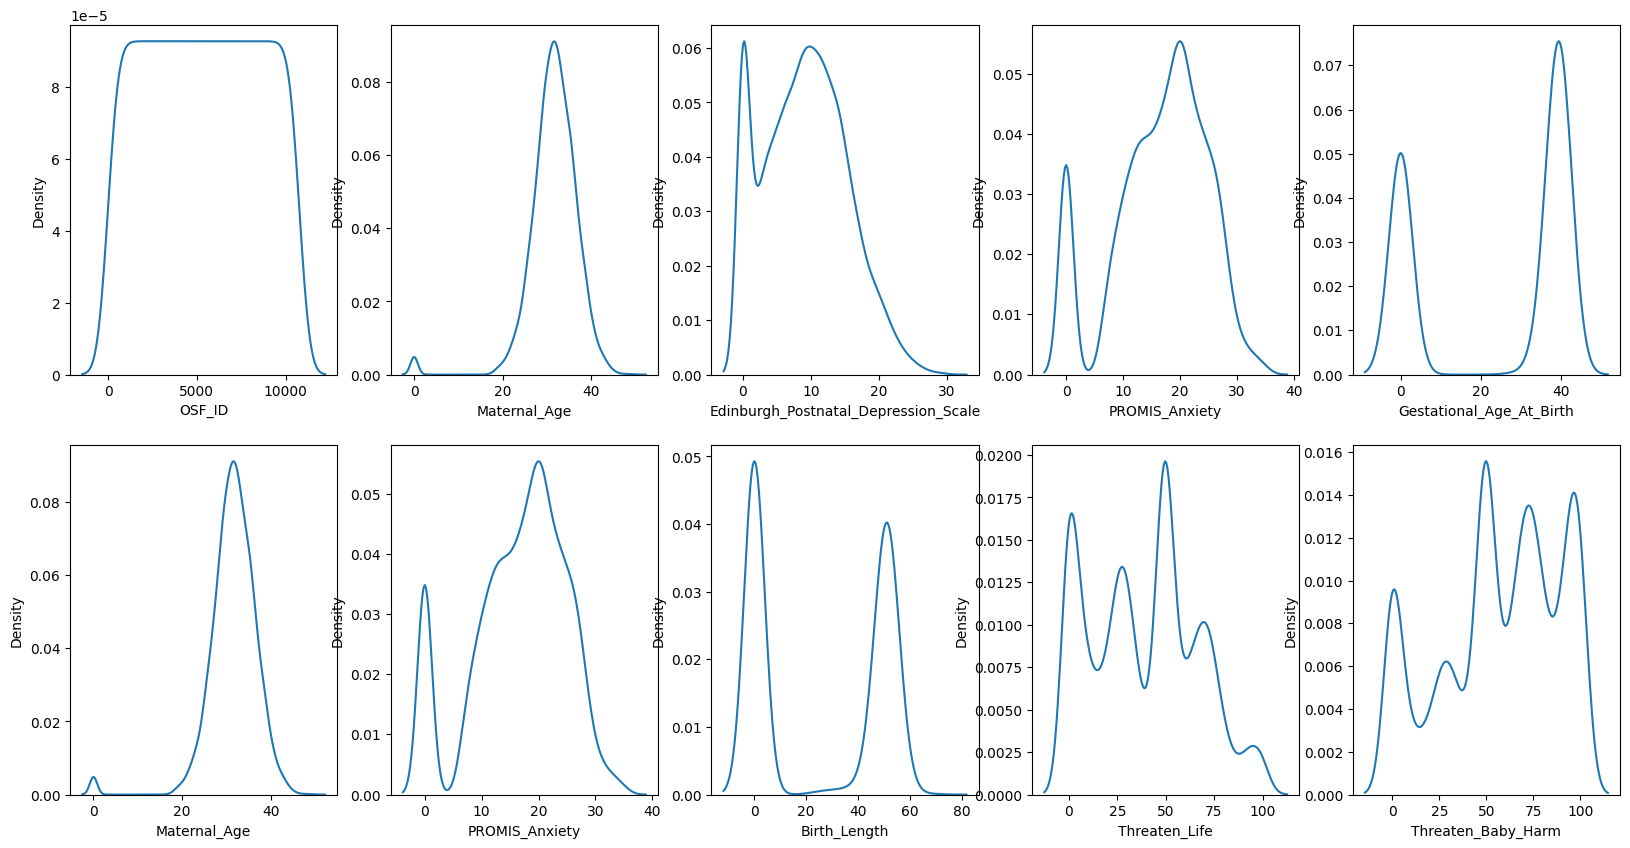

In [203]:
covid_df_numerics_only = covid_df.select_dtypes(include=np.number)
covid_df_numerics_only = covid_df_numerics_only.fillna(0)

fig, axes = plt.subplots(figsize=(20,10), ncols=5, nrows=2)

for i in np.arange(2):
    for j in np.arange(5):
        column_index = (i+1) * (j+1)
        column_name = covid_df_numerics_only.columns[column_index-1]
        sns.kdeplot(covid_df_numerics_only[column_name], ax=axes[i, j])

8. Scatter Plot: Plot Birth_Weight against Birth_Length to visualize any relationship
between the two variables. . (covid dataset)

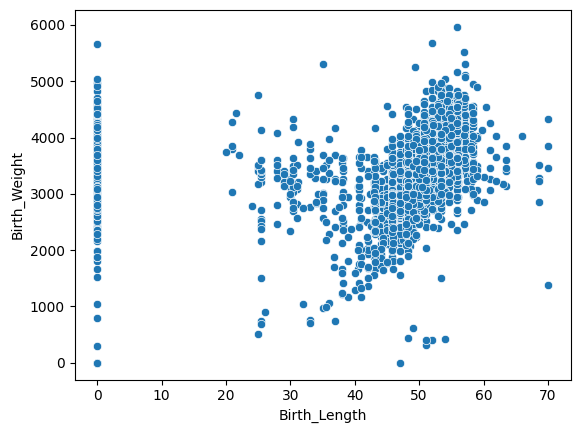

In [164]:
covid_df['Birth_Length'] = covid_df['Birth_Length'].fillna(0)
covid_df['Birth_Weight'] = covid_df['Birth_Weight'].fillna(0)

sns.scatterplot(data=covid_df, x='Birth_Length', y='Birth_Weight')
plt.show()

9. 3D Scatter Plot: Create a 3D scatter plot to visualize the relationship between
Maternal_Age, Gestational_Age_At_Birth, and Birth_Weight. . (covid dataset)

Text(0.5, 0, 'Birth_Weight')

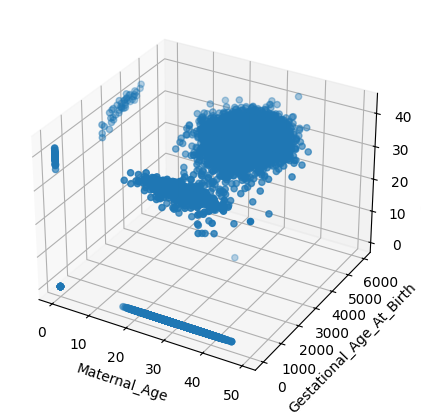

In [175]:
covid_df['Maternal_Age'] = covid_df['Maternal_Age'].fillna(0)
covid_df['Gestational_Age_At_Birth'] = covid_df['Gestational_Age_At_Birth'].fillna(0)
covid_df['Birth_Weight'] = covid_df['Birth_Weight'].fillna(0)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(projection='3d')

ax.scatter(covid_df['Maternal_Age'], covid_df['Birth_Weight'], covid_df['Gestational_Age_At_Birth'])
ax.set_xlabel('Maternal_Age')
ax.set_ylabel('Gestational_Age_At_Birth')
ax.set_zlabel('Birth_Weight')

10. Subplots with Categorical Hue: Create subplots that compare Maternal_Age,
Birth_Length, and Birth_Weight while coloring points based on Household_Income
categories. (covid dataset)

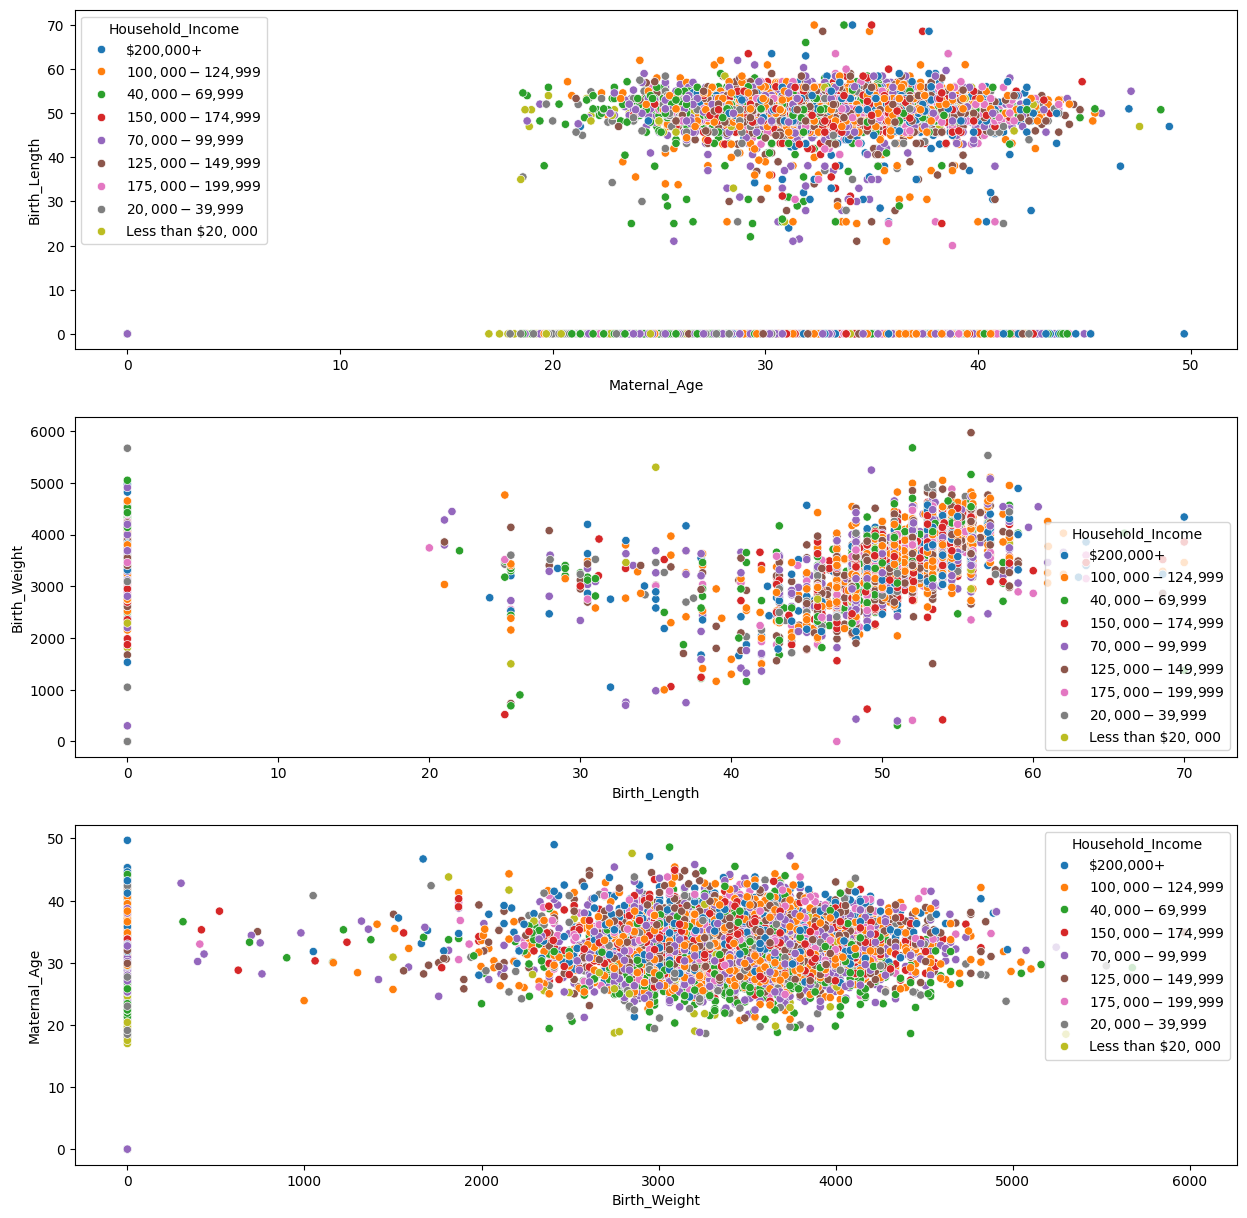

In [216]:
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
sns.scatterplot(ax=axes[0], data=covid_df, x='Maternal_Age', y='Birth_Length', hue='Household_Income')
sns.scatterplot(ax=axes[1], data=covid_df, x='Birth_Length', y='Birth_Weight', hue='Household_Income')
sns.scatterplot(ax=axes[2], data=covid_df, x='Birth_Weight', y='Maternal_Age', hue='Household_Income')
plt.show()

11. Create a pairplot of the dataset that includes Maternal_Age, Birth_Length, Birth_Weight,
and Gestational_Age_At_Birth as the variables to compare. Add the hue parameter to
color the plots based on Household_Income categories.

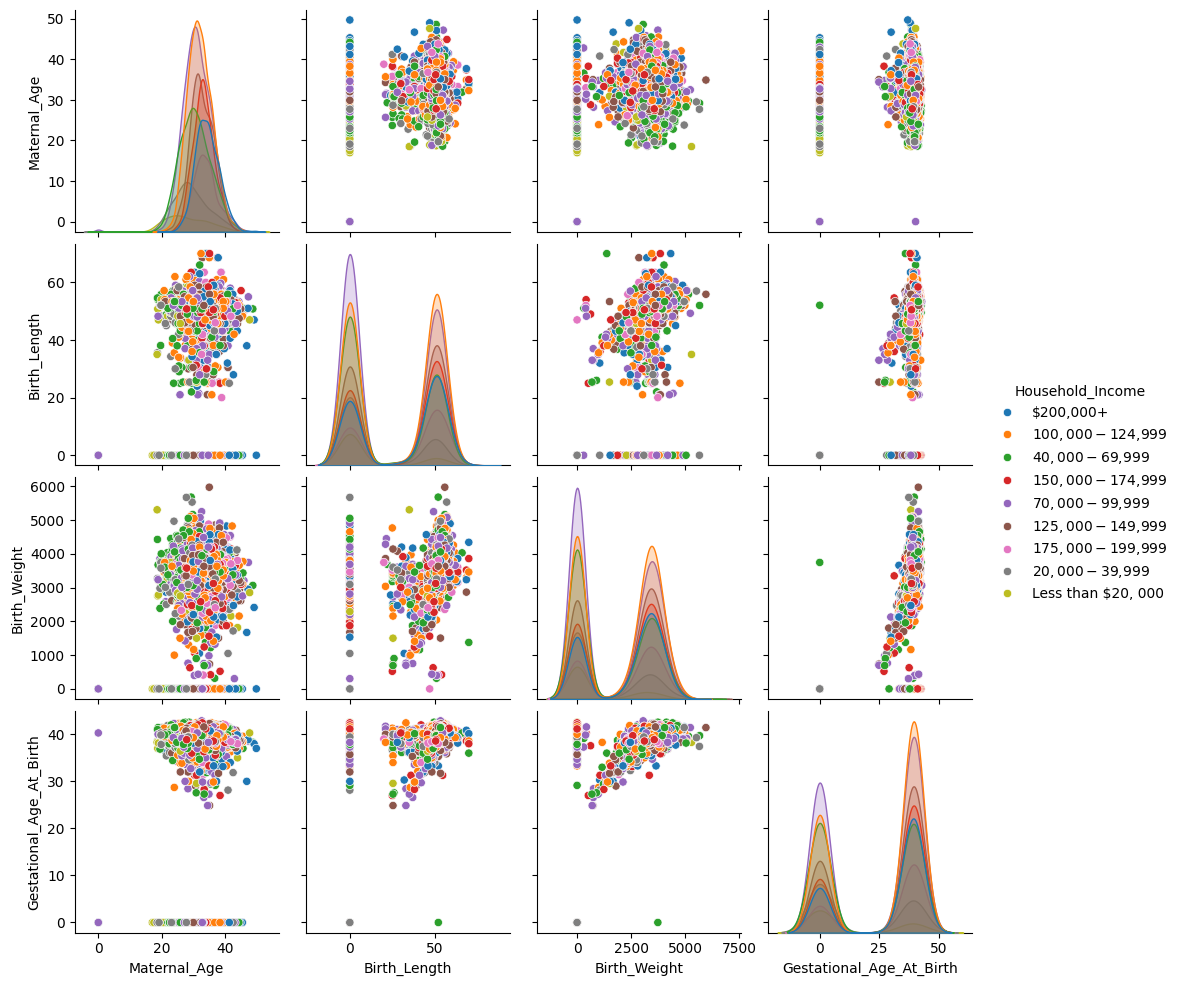

In [220]:
temp_df = covid_df[['Maternal_Age', 'Birth_Length', 'Birth_Weight', 'Gestational_Age_At_Birth', 'Household_Income']]

sns.pairplot(temp_df, hue='Household_Income')

12. Use JointGrid to create a customized grid showing the relationship between Birth_Length
and Gestational_Age_At_Birth (convert weeks into months one month=4.33 week). Add
scatter plots to the joint axes and KDE plots to the marginal axes

/tmp/ipykernel_410795/2873972068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Gestational_Age_At_Birth_Month'] = temp_df['Gestational_Age_At_Birth']/4.33


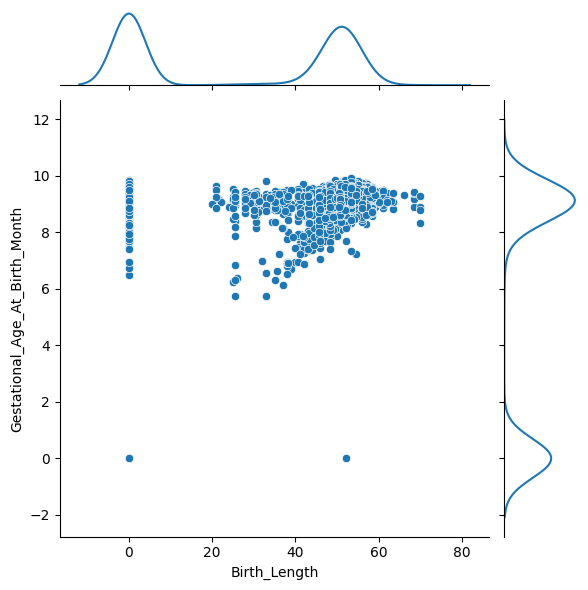

In [229]:
temp_df = covid_df[['Birth_Length', 'Gestational_Age_At_Birth']]
temp_df['Gestational_Age_At_Birth_Month'] = temp_df['Gestational_Age_At_Birth']/4.33

g = sns.JointGrid(data=temp_df, x='Birth_Length', y='Gestational_Age_At_Birth_Month')
g.plot(sns.scatterplot, sns.kdeplot)

13. Find out each team's year-wise participation in FIFA. Given a dataset containing FIFA
match details, create a heatmap using Seaborn to visualize the year-wise participation of
each team. The dataset contains columns such as home_team, away_team, and Year.
Combine the participation of both home and away teams, then group the data by Year
and team. Finally, display the heatmap where the x-axis represents the year, the y-axis
represents the team, and the color intensity reflects the number of participations.

<Axes: xlabel='None-Year', ylabel='team'>

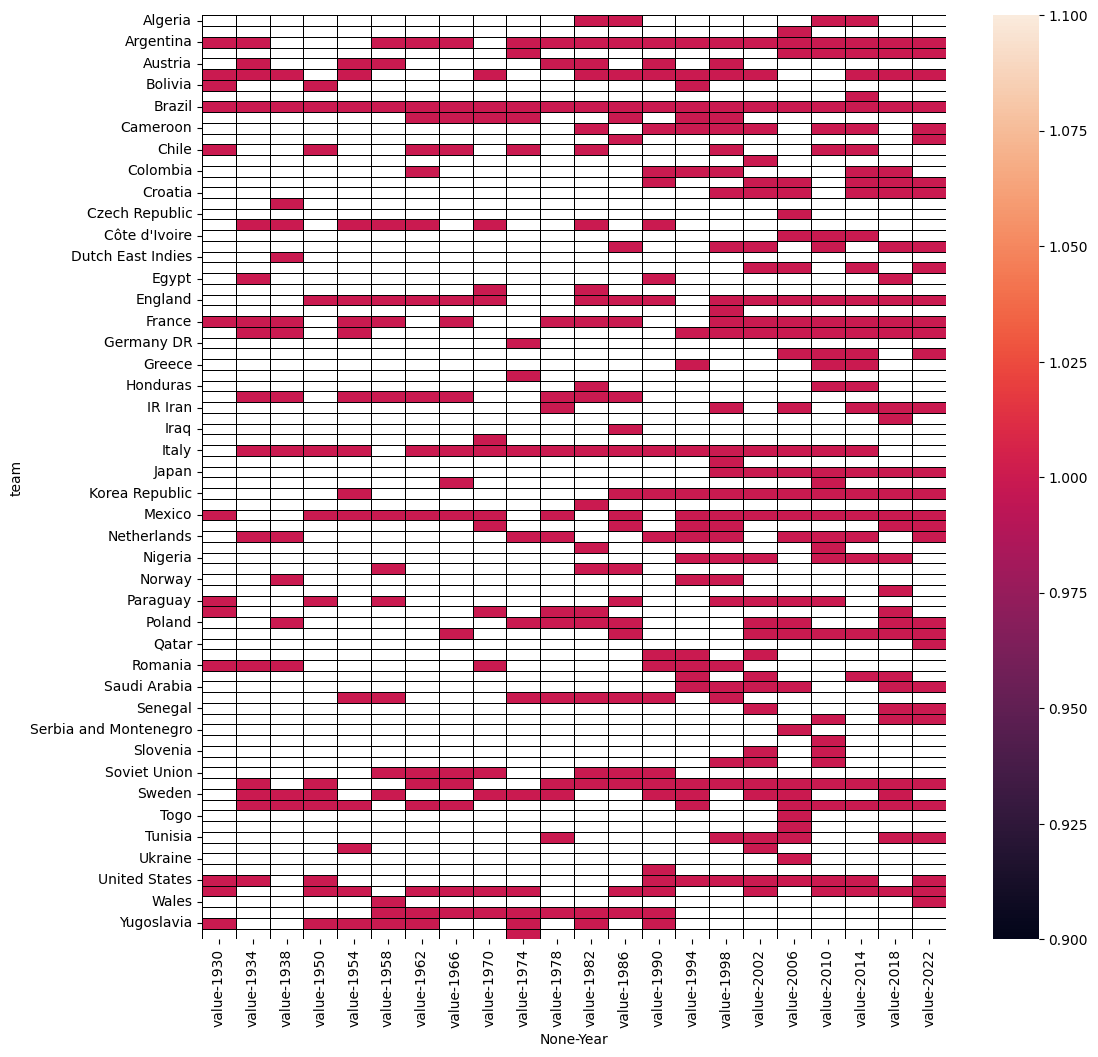

In [269]:
home_team_df = fifa_matches_df[['home_team', 'Year']]
home_team_df = home_team_df.rename(columns = {'home_team': 'team'})
away_team_df = fifa_matches_df[['away_team', 'Year']]
away_team_df = away_team_df.rename(columns = {'away_team': 'team'})

temp_df = pd.concat([home_team_df, away_team_df])
temp_df['value'] = 1
grid = temp_df.pivot_table(index='team', columns='Year')

plt.figure(figsize=(12,12))
sns.heatmap(grid,linecolor='black',linewidths=0.5)